In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
from mpl_toolkits.mplot3d import Axes3D
foldername='Results'
if not os.path.exists(foldername):
    os.makedirs(foldername)
    

In [ ]:


# Defining the model paramters 
s0=100
k=85
noofpaths=10000
noftimesteps=1000
matrurity=1
r=0.05
sigma=0.25

def monte_carlo_pricing(type,s0,k,r,sigma,maturity,noofpaths,noftimesteps):
    np.random.seed(42)
    results={}
    type=type.lower()
    dt=maturity/noftimesteps
    paths=np.zeros((noofpaths,noftimesteps+1))
    paths_bar=np.zeros((noofpaths,noftimesteps+1))
    time=np.zeros(noftimesteps+1)
    time[0]=0
    for i in range(1,noftimesteps+1):
        time[i]=time[i-1]+dt
    paths[:,0]=s0
    paths_bar[:,0]=s0
    z=np.random.normal(0,1,size=(noofpaths,noftimesteps))
    z_bar = - z
    for i in range(0,noftimesteps):
        z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i],ddof=1)
        z_bar[:,i]=(z_bar[:,i]-np.mean(z_bar[:,i]))/np.std(z_bar[:,i],ddof=1)
        paths[:,i+1]= paths[:,i] + paths[:,i]*r*dt + paths[:,i]*sigma*z[:,i]*np.power(dt,0.5)
        paths_bar[:,i+1]=paths_bar[:,i] + paths_bar[:,i]*r*dt + paths_bar[:,i]*sigma*z_bar[:,i]*np.power(dt,0.5)
        time[i+1]=time[i]+dt
    st=paths[:,-1]
    st_anithetic=(paths[:,-1]+paths_bar[:,-1])/2
    results['time']=time
    results['paths']=paths
    results['paths_anithetic']=paths_bar
    results['terminal_stock']=paths[:,-1]
    results['terminal_stock_anithetic']=paths_bar[:,-1]
    if type == 'call':
        price = np.exp(-r*maturity)*np.mean(np.maximum(st-k,0))
        price_anithetic = np.exp(-r*maturity)*np.mean(np.maximum(st_anithetic-k,0))
        results['price']=price
        results['anithetic'] = price_anithetic
        return results
    elif type == 'put':
        price = np.exp(-r*maturity)*np.mean(np.maximum(k-st,0))
        price_anithetic = np.exp(-r*maturity)*np.mean(np.maximum(k-st_anithetic,0))
        results['price']=price
        results['anithetic'] = price_anithetic
    return results    

Results=monte_carlo_pricing('call',100,80,0.05,0.25,1,1000,100)



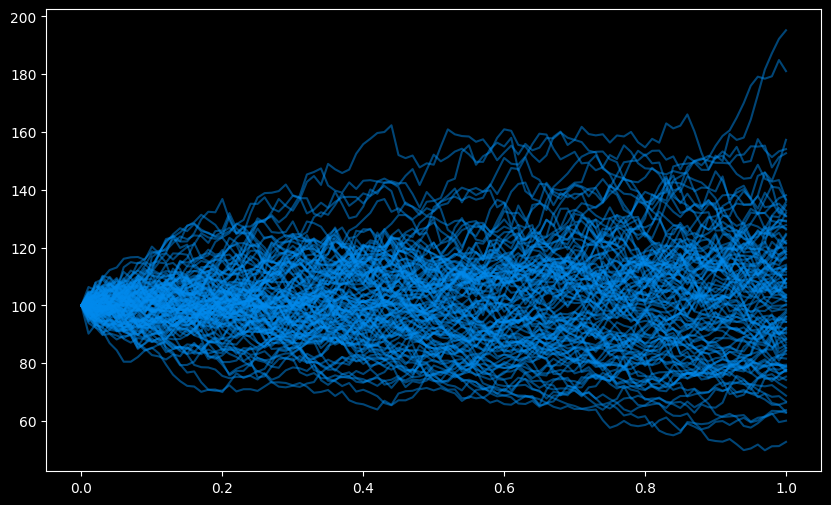

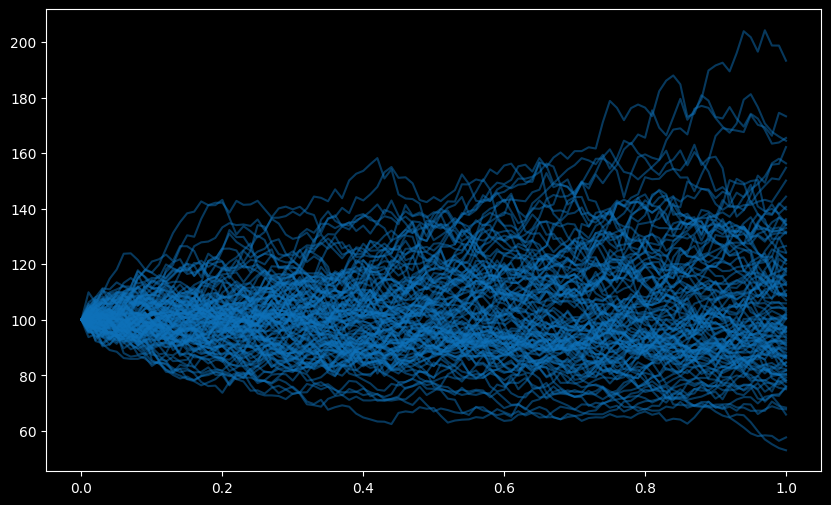

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(Results['time'],Results['paths'][i,:],color="#008aed",alpha=0.5,label='Stock_paths')
file_name='stock paths nomral gbm.png'
file_path=os.path.join(foldername,file_name)
plt.savefig(file_path,bbox_inches='tight',dpi=300)

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(Results['time'],Results['paths_anithetic'][i,:],color="#0e71b9",alpha=0.5,label='Stock_paths_anithetic')
file_name='stock paths anithetic gbm.png'
file_path=os.path.join(foldername,file_name)
plt.savefig(file_path,bbox_inches='tight',dpi=300)



In [17]:

strikes=np.linspace(70,120,6)
Duration=np.linspace(1,5,5)
Data_0= pd.DataFrame(index=range(6),columns=range(5))
Data_1=pd.DataFrame().reindex_like(Data_0)
for i in range(5):
    for j in range(6):
        Data_0.iloc[j,i] = monte_carlo_pricing('call',s0,strikes[j],r,sigma,Duration[i],noofpaths,noftimesteps)['price']
        Data_1.iloc[j,i] = monte_carlo_pricing('call',s0,strikes[j],r,sigma,Duration[i],noofpaths,noftimesteps)['anithetic']




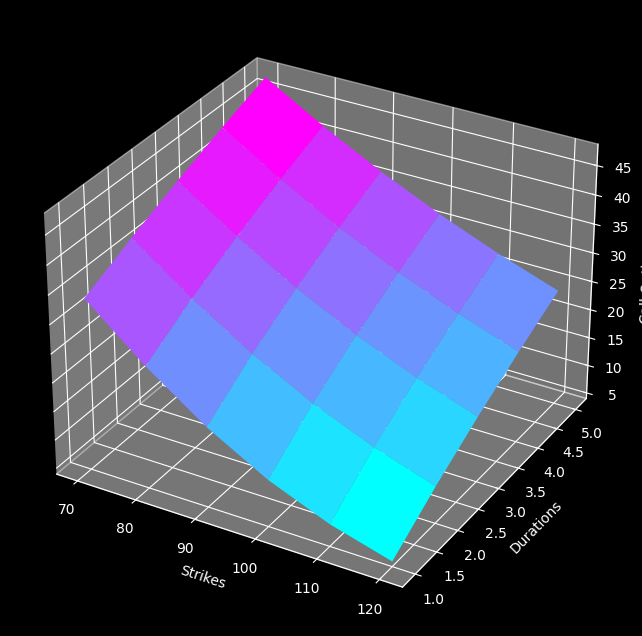

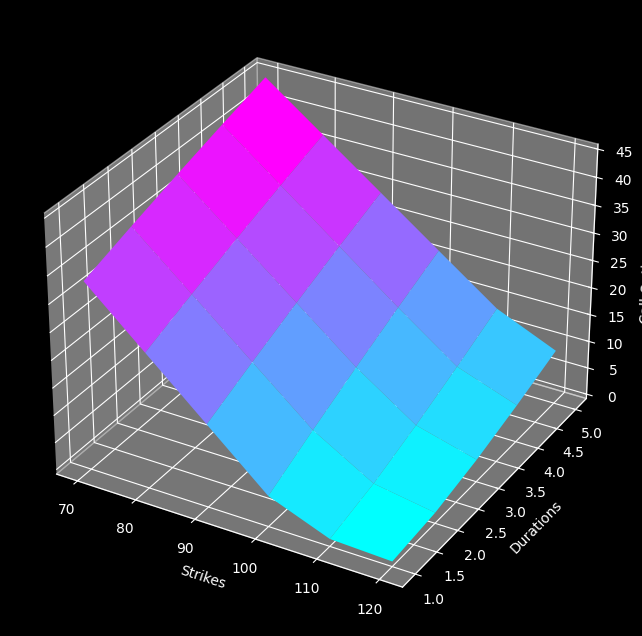

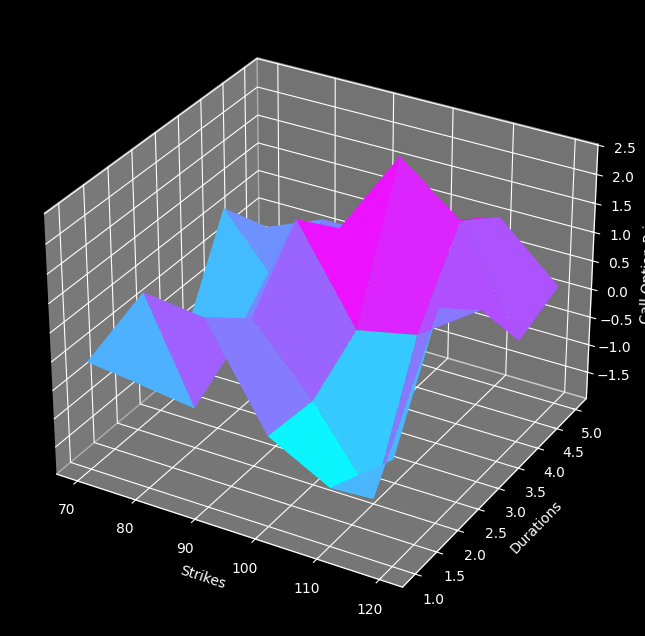

In [55]:
strikes=np.linspace(70,120,6)
Duration=np.linspace(1,5,5)
x,y=np.meshgrid(strikes,Duration)

z = Data_0.values.T
z_1 = Data_1.values.T
err= np.random.standard_normal(size=(5,6))

# The general option prce plot for strike and duration 
plt.style.use('dark_background')
fig=plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='cool')

# Label axes
ax.set_xlabel('Strikes')
ax.set_ylabel('Durations')
ax.set_zlabel('Call Option Price')
file_name='3d plot for option price normal gbm monte carlo simulation'
file_path=os.path.join(foldername,file_name)
plt.savefig(file_path,bbox_inches='tight',dpi=300)

#The apithetich plot for the option price call
plt.style.use('dark_background')
fig=plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z_1, cmap='cool')

# Label axes
ax.set_xlabel('Strikes')
ax.set_ylabel('Durations')
ax.set_zlabel('Call Option Price')

file_name='3d plot for option price using apithetic gbm monte carlo simulation'
file_path=os.path.join(foldername,file_name)
plt.savefig(file_path,bbox_inches='tight',dpi=300)

plt.style.use('dark_background')
fig=plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, err, cmap='cool')

# Label axes
ax.set_xlabel('Strikes')
ax.set_ylabel('Durations')
ax.set_zlabel('Call Option Price')

file_name='3d plot for Error'
file_path=os.path.join(foldername,file_name)
plt.savefig(file_path,bbox_inches='tight',dpi=300)




In [56]:
file_name='Call_Price using Normal Monte carlo simulation.csv'
file_name_1='Call_Price using Apithetic Monte carlo simulation.csv'
file_path=os.path.join(foldername,file_name)
file_path_1=os.path.join(foldername,file_name_1)

Data_0.to_csv(file_path)
Data_1.to_csv(file_path_1)